# Librerias de Visualizacion

- Bokeh
- Matplotlib
- Seaborn
- plotly
- Altair

In [1]:
import sys

def fibonacci_recursivo(n):
    if n == 0 or n == 1:
        return 1
    
    return fibonacci_recursivo(n - 1) + fibonacci_recursivo(n - 2)

def fibonacci_dinamico(n, memo={}):
    if n == 0 or n == 1:
        return 1
    
    try:
        return memo[n]
    except KeyError:
        result = fibonacci_dinamico(n - 1, memo) + fibonacci_dinamico(n - 2, memo)
        memo[n] = result
        return result
    
sys.setrecursionlimit(10002)
fibonacci_dinamico(50)
    

20365011074

## Caminos Aleatorios

- Es un tipo de simulacion que elige aleatoriamente una decision dentro de un conjunto de decisiones validas
- Se utiliza en muchos campos del conocimiento cuando los sistemas no son deterministas e incluye elementos de aleatoriedad.

In [2]:
import random
from bokeh.plotting import figure, show

class Borracho:
    def __init__(self, name):
        self.name = name
        
class BorrachoTradicional(Borracho):
    def __init__(sefl, name):
        super().__init__(name)
    
    def walk(self):
        return random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])

class Coordenada:
    def __init__(self, x ,y):
        self.x = x
        self.y = y
        
    def move(self, delta_x, delta_y):
        return Coordenada(self.x + delta_x, self.y + delta_y)
    
    def distance(self, coordenada):
        delta_x = self.x - coordenada.x
        delta_y = self.y - coordenada.y
        
        return (delta_x ** 2 + delta_y ** 2) ** 0.5
    
class Campo:
    def __init__(self):
        self.coordenadas = {}
        
    def add_borracho(self, borracho, coordenada):
        self.coordenadas[borracho] = coordenada
        
    def move_borracho(self, borracho):
        delta_x, delta_y = borracho.walk()
        coordenada_actual = self.coordenadas[borracho]
        new_coordenada = coordenada_actual.move(delta_x, delta_y)
        self.coordenadas[borracho] = new_coordenada
        
    def get_coordenada(self, borracho):
        return self.coordenadas[borracho]

def walk(campo, borracho, steps):
    start = campo.get_coordenada(borracho)
    
    for _ in range(steps):
        campo.move_borracho(borracho)
        
    return start.distance(campo.get_coordenada(borracho))

def graficar(x, y):
    grafica = figure(title="Camino Aleatorio", x_axis_label="Pasos", y_axis_label="Distancia")
    grafica.line(x, y, legend= "Distancia Media")
    
    show(grafica)

def simulate_walk(steps, tries, borracho):
    borracho = borracho(name = "Jose")
    start = Coordenada(0, 0)
    distances = []
    
    for _ in range(tries):
        campo = Campo()
        campo.add_borracho(borracho, start)
        simulation = walk(campo, borracho, steps)
        distances.append(round(simulation, 1))
    
    return distances
        
    

tries = 100
walk_distances = [10, 100, 1000, 10000]
borracho = BorrachoTradicional
distancias_medias = []
for steps in walk_distances:
    distances = simulate_walk(steps, tries, borracho)
    distancia_media = round(sum(distances) / len(distances), 4)
    distancia_maxima = max(distances)
    distancia_minima = min(distances)
    distancias_medias.append(distancia_media)
    print(f"{borracho.__name__} caminata aleatoria de {steps} pasos")
    print(f"Media {distancia_media}")
    print(f"Maxima {distancia_maxima}")
    print(f"Minima {distancia_minima}")

graficar(walk_distances, distancias_medias)

BorrachoTradicional caminata aleatoria de 10 pasos
Media 2.786
Maxima 7.2
Minima 0.0
BorrachoTradicional caminata aleatoria de 100 pasos
Media 8.448
Maxima 22.8
Minima 0.0
BorrachoTradicional caminata aleatoria de 1000 pasos
Media 28.064
Maxima 73.6
Minima 3.2
BorrachoTradicional caminata aleatoria de 10000 pasos
Media 90.135
Maxima 211.6
Minima 10.0


## Programacion Estocastica

- Un programa es deterministico si cuando se corre con el mismo *input* produce el mismo output.
- Los programas deterministicos son muy importantes, pero existen problemas que no pueden resolverse de esta manera.
La programacion estocastica permite introducir aleatoriedad a nuestros programas para crear simulaciones que permiten resolver otro tipo de problemas.

- Los programas estocasticos se aprovechan de que las distribuciones probabilisticas de un problema se conocen o pueden ser estimadas.

## Probabilidades

- La probabilidad es una medida de la certidumbre asociada a un evento o suceso futuro y suele expresarse como un numero entre 0 y 1
- Una probabilidad de 0 significa que un suceso jamas sucedera, mientras que 1 esta garantizado de suceder en el futuro.
- Al hablar de probabilidad preguntamos que fraccion de todos los posibles eventos tiene la propiedad que buscamos
- Pror eso es importante poder calcular todas las posibilidades de un evento para entender su probabilidad
- La probabilidad de que un evento suceda y que no suceda es siempre 1

```python
# Ley de complemento
P(A) + P(~A) = 1

# Ley multiplicativa
P(A y B) = P(A) * P(B)

# Ley Aditiva
P(A o B) = P(A) + P(B) (Mutuamente exclusivos)
P(A o B) = P(A) + P(B) - P(A y B) (no exclusivos)
```

In [3]:
import random

def tirar_dado(numero_tiros):
    secuencia_tiros = []
    for _ in range(numero_tiros):
        tiro = random.choice([1, 2, 3, 4, 5, 6])
        secuencia_tiros.append(tiro)
    
    return secuencia_tiros

def main(numero_tiros, numero_intentos):
    tiros = []
    for _ in range(numero_intentos):
        secuencia_tiros = tirar_dado(numero_tiros)
        tiros.append(secuencia_tiros)
    
    tiros_1 = 0
    for tiro in tiros:
        if 1 in tiro:
            tiros_1 += 1
    
    probabilidad_tiros_1 = tiros_1 / numero_intentos
    print(f"Probabilidad de obtener un 1 en {numero_tiros} tiros = {probabilidad_tiros_1}")

numero_tiros = int(input("Cuantos tiros del dado: "))
numero_intentos = int(input("Cuantas veces correra la simulacion: "))
main(numero_tiros, numero_intentos)

Cuantos tiros del dado: 50
Cuantas veces correra la simulacion: 100
Probabilidad de obtener un 1 en 50 tiros = 1.0


El principio guía de la Inferencia Estadística es que una muestra aleatoria tiende a exhibir las mismas propiedades que la población de la cual fue extraída

## Falacia del Apostador

- La falacia del apostador señala que despues de un evento extremo, ocurriran eventos menos extremos para nivelar la media

- La regresion a la media señala que despues de un evento aleatorio extremo, el siguiente evento probablemente sera menos extremo

### Media

- Es una medida de tendencia central
- Comunmente es conocida como el promedio
- La media de una pobalcion se denota con el simbolo u (masomenos). La media de una muestra se denota con x (con una _ arriba)

### Varianza

- La varianza mide que tan propagados se encuentran un conjunto de valores aleatorios de su media
- Mientras que la media nos da una idea de donde se encuentran los valores, la varianza nos dice que tan dispersos se encuentran
- La varianza siempre debe entenderse con respecto a la media.

### Desviacion estandar

- La desviacion estandar es la raiz cuadrada de la varianza
- Nos permite entender, tambien, la propagacion y se debe entender siempre relacionado a la medida
- La ventaja sobre la varianza es que la desviacion estandar esta en las mismas unidades que la media.

### Distribucion Normal

- Es una de las distribuciones mas recurrentes en cualquier ambito
- Se define completamente por su media y su desviacion estandar
- Permite calcular intervalos de confianza con la regla empirica


In [4]:
# estadisticas
import math
import random

def media(x):
    return sum(x) / len(x)

def varianza(x):
    mu = media(x)
    acumulador = 0
    for i in x:
        acumulador += (i - mu) ** 2
        
    return abs(acumulador - len(x))


def desviacion_estandar(x):
    return math.sqrt(varianza(x))
    

if __name__ == "__main__":
    x = [random.randint(9, 12) for i in range(20)]
    mu = media(x)
    var = varianza(x)
    sigma = desviacion_estandar(x)
    
    print(f'Arreglo x: {x}')
    print(f'Media: {mu}')
    print(f'Varianza: {var}')
    print(f'Sigma: {sigma}')

Arreglo x: [12, 11, 9, 10, 10, 12, 10, 11, 10, 11, 10, 11, 12, 11, 9, 12, 12, 9, 12, 12]
Media: 10.8
Varianza: 3.1999999999999957
Sigma: 1.7888543819998306


### Regal Empirica

- Tambien conocida como la regla 68-95-99.7
- Señala cual es la dispersion de los datos en una distribucion normal a uno, dos y tres sigmas
- Permite calcular probabilidades con la densidad de la distribucion normal

## Simulaciones de Montecarlo

El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser "la capital del juego de azar", al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 y se mejoraron enormemente con el desarrollo de la computadora.

- Permite crear simulaciones para predecir el resultado de una computadora
- Permite convertir problemas deterministicos en problemas estocasticos
- Es utilizado en una gran diversidad de areas desde la ingenieria hasta la biologia y el derecho

## Simulacion de Barajas

In [5]:
# Barajas
import random
import collections

PALOS = ["espada", "corazon", "rombo", "trebol"]
VALORES = ["as", "2", "3", "4", "5", "6", "7", "8", "9", "10", "jota", "reina", "rey"]

def crear_baraja():
    barajas = []
    for palo in PALOS:
        for valor in VALORES:
            barajas.append((palo, valor))
        
        
    return barajas

def obtener_mano(barajas, tamano_mano):
    mano = random.sample(barajas, tamano_mano)
    
    return mano

def main(tamano_mano, intentos):
    barajas = crear_baraja()
    manos = []
    for _ in range(intentos):
        mano = obtener_mano(barajas, tamano_mano)
        manos.append(mano)
    
    pares = 0
    for mano in manos:
        valores = []
        for carta in mano:
            valores.append(carta[1])
            
        counter = dict(collections.Counter(valores))
        for val in counter.values():
            if val == 2:
                pares += 1
                break
                
    probabilidad_par = pares / intentos
    print(f"La probabilidad de obtener un par en una mano de {tamano_mano} barajas es {probabilidad_par}")

tamano_mano = int(input("De cuantas barajas sera la mano: "))
intentos = int(input("Cuantos intentos para calcular la probabilidad: "))
main(tamano_mano, intentos)

# Probabilidad de Consecutiva

De cuantas barajas sera la mano: 5
Cuantos intentos para calcular la probabilidad: 1000
La probabilidad de obtener un par en una mano de 5 barajas es 0.479


## Calculo de PI



In [11]:
def aventar_agujas(num_agujas):
    dentro_del_circulo = 0
    
    for _ in range(num_agujas):
        x = random.random() * random.choice([-1, 1])
        y = random.random() * random.choice([-1, 1])
        distancia_desde_el_centro = math.sqrt(x**2 + y**2)
        
        if distancia_desde_el_centro <= 1:
            dentro_del_circulo += 1
            
    return (4 * dentro_del_circulo) / num_agujas

def estimacion(num_agujas, num_intentos):
    estimados = []
    for _ in range(num_intentos):
        estimacion_pi = aventar_agujas(num_agujas)
        estimados.append(estimacion_pi)
    
    media_estimados = media(estimados)
    sigma = desviacion_estandar(estimados)
    print(f"Est={round(media_estimados, 5)}, Sigma={round(sigma, 5)}, Agujas={num_agujas}")
    
    return (media_estimados, sigma)
    
def estimar_pi(precision, numero_intentos):
    numero_agujas = 1000
    sigma = precision
    count = 0
    
    while sigma >= precision / 1.96:
        if count == 3:
            break
            
        media, sigma = estimacion(numero_agujas, numero_intentos)
        numero_agujas *= 2
        count += 1
        
    return media

if __name__ == "__main__":
    estimar_pi(0.01, 1000)

Est=3.14248, Sigma=31.57945, Agujas=1000
Est=3.14266, Sigma=31.60062, Agujas=2000
Est=3.14104, Sigma=31.61223, Agujas=4000


### Muestreo

- Hay ocasiones en la que no tenemos acceso a toda la poblacion que queremos explorar.
- Uno de los grandes descubrimientos de la estadistica es que las muestras aleatorias tienden a mostrar las mismas propiedades de la poblacion objetivo.
- El tipo de muestreo que hemos hecho hasta ahora es muestreo probabilistico.

#### Tipos
- En un muestreo aleatorio cualquier miembro de la poblacion tiene la misma probabilidad de ser escogido
- En un muestreo estratificado tomamos en consideracion las caracteristicas de la poblacion para partirla en subgrupos y luego tomamos muestras de cada subgrupo
    - Incrementa la probabilidad de que el muestreo sea representativo de la poblacion

## Teorema del Límite Central

- Es uno de los teoremas mas importantes de la estadistica
- Establece que muestras aleatorias de cualquier distribucion van a tener una distribucion normal
- Permite entender cualquier distribucion como la distribucion normal de sus medias y eso nos permite aplicar todo lo que sabemos de distribuciones normales

## Datos Experimentales

- Es la aplicacion del metodo cientifico
- Es necesario comenzar con una teoria o hipotesis sobre el resultado al que se quiere llegar
- Basado en la hipotesis se debe crear un experimento para validar o falsear la hipotesis
- Se valida o falsea una hipotesis midiendo la diferencia entre las mediciones experimentales y aquellas mediciones predichas por la hipotesis

## Regresion Lineal

- Permite aproximar una funcion a un conjunto de datos obtenidos de manera experimental
- No necesariamente permite aproximar funciones lineales, sino que sus variantes permiten aproximar cualquier funcion polinomica

In [7]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 2, 3, 5, 4, 6, 8, 7, 9])

coeffs = np.polyfit(x, y, 1)
print(coeffs)

[0.96666667 1.13333333]


In [8]:
m = coeffs[0]
b = coeffs[1]
est_y = (m * x) + b

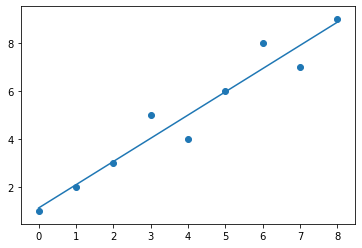

In [12]:
import matplotlib.pyplot as plt

plt.plot(x, est_y)
plt.scatter(x, y)
plt.show()